<a href="https://colab.research.google.com/github/Spnetic-5/DSC_ML_Workshop/blob/master/K_Nearest_Neighbors_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

### k-NN dataset

https://drive.google.com/drive/folders/1vbUc4wMWdFUEFlJDLH_EJwLy4wheszX1?usp=sharing

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("Classified Data.csv",index_col=0)

In [ ]:
df.head(n=5) # returns the first n rows...here n=5 by default

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale. That is why while using KNN we standardize everything on a standard scale.

Lets take an example where the person's age ranges from 25 to 40 whereas the income variable ranges from 50,000 to 110,000.

Lets take 2 observations  

    Salary Age
1)  100000  30   
2)  80000   25

Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2) = 20000.000625

It can be noted here that the high magnitude of income affected the distance between the two points. This will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude


After scaling

    Salary Age
1)  0.608  0.260   
2)  -0.447 1.192

Euclidean Distance = [(0.608+0.260)^2 + (-0.447+1.192)^2]^(1/2) = 1.1438

This time the distance is around 1.1438. We can clearly see that the distance is not biased towards the income variable. It is now giving similar weightage to both the variables. Hence, it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN or K-Means.


In [ ]:
from sklearn.preprocessing import StandardScaler # It will look a lot like as if it was a ML model.

In [ ]:
scaler = StandardScaler() # Create an instance of StandardScale as we would for some ML algorithm.

In [ ]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
# As we want to fit this to our training data and not the actual TARGET CLASS as that is not scaled.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
# Transform method performs the standardization by centering and scaling.
# Gives us a scaled version of values in df excluding TARGET CLASS

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1]) # Creating a feature DataFrame
# Passing in our scaled_features array as data and for column names we specify df.columns but the last TARGET CLASS so [:-1]
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = scaled_features
Y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state = 101)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.
And then we will move on towards using Elbow Method to choose the ideal K value.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
# By specifying n_neighbors it means number of neighbors we want for this model. we set it as 1 for this time.

In [ ]:
knn.fit(X_train,y_train) # Fitting on our training data.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)
pred# Shows to which class a particular prediction belongs to.

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

## Predictions and Evaluation

Let's Evaluate KNN model! After this we do elbow method to find out an optimal k value.

In [ ]:
from sklearn.metrics import confusion_matrix

![](.\assets\confusion_matrix.png)

In [ ]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


So far model looks good with an accuracy of TP+TN/Total = (151+126)/300 = 0.92. Also error = (FP+FN)/Total =  (15 + 8)/300 = 0.07666
- Let's see if we can even further improve the model.

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [ ]:
error_rate = [] # First we set error_rate as an empty list. Then we iterate on many models using different k value.
# And we plot out the error rate and see which one has the lowest error rate.

# Will take some time
for i in range(1,40): # Check every k value from 1 to 40 for all of those values we will call KNeighborsClassifier, with
    # n_neighbors = i, then we fit that model, then we say pred_i off of test set and then to error_rate we append
    # mean of pred_i != y_test. AKA Average error rate being added to error_rate list for every iteration from 1 to 40.
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

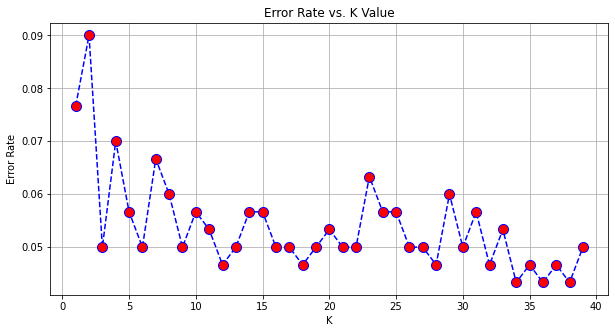

In [ ]:
plt.figure(figsize=(10,5)) # A little larger than usual for better understanding purpose.
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10) # Plot of range(1,40) vs error_rate
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)

- We notice that we start with error of around 0.075 and it went up for k = 2 and then it went drastically down for k=3 and so on.

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [ ]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))

WITH K=1


[[151   8]
 [ 15 126]]


In [ ]:
# NOW WITH K=17
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))

WITH K=23


[[153   6]
 [  9 132]]


In [ ]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))

WITH K=23


[[150   9]
 [ 10 131]]


# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!